In [91]:
import pandas as pd
import numpy as np

In [92]:
df= pd.read_csv(r'C:\Users\hp\Downloads\Train.csv')

In [93]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [94]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
99995,99995,1,2,"Bell, Adele",female,62.0,0,0,PC 15008,14.86,D17243,C
99996,99996,0,2,"Brown, Herman",male,66.0,0,0,13273,11.15,NaN,S
99997,99997,0,3,"Childress, Charles",male,37.0,0,0,NaN,9.95,NaN,S
99998,99998,0,3,"Caughlin, Thomas",male,51.0,0,1,458654,30.92,NaN,S
99999,99999,0,3,"Enciso, Tyler",male,55.0,0,0,458074,13.96,NaN,S


In [95]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [97]:
##nulls_percentage = nulls[nulls!=0]/df.shape[0]*100
##print('the percentages of null values per feature:\n')
##print(round(nulls_percentage,2))

In [98]:
df.shape[0]

100000

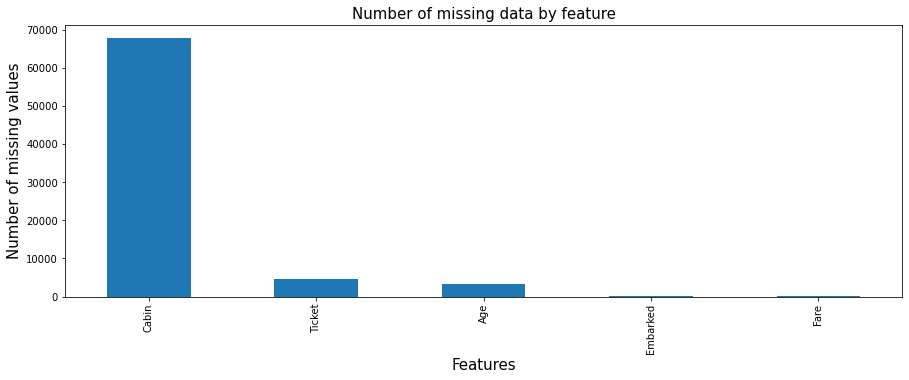

In [99]:
# Plot missing values
plt.figure(figsize=(15,5))
missing= df.isnull().sum()
missing= missing[missing > 0]
missing.sort_values(ascending= False, inplace=True)
plt.xlabel("Features", fontsize=15)
plt.ylabel("Number of missing values", fontsize=15)
plt.title("Number of missing data by feature", fontsize=15)
missing.plot(kind="bar")

plt.show()

In [27]:
df.isna().apply(pd.value_counts).T

,False,True
PassengerId,100000.0,NaN
Survived,100000.0,NaN
Pclass,100000.0,NaN
Name,100000.0,NaN
Sex,100000.0,NaN
Age,96708.0,3292.0
SibSp,100000.0,NaN
Parch,100000.0,NaN
Ticket,95377.0,4623.0
Fare,99866.0,134.0


In [101]:
df.drop(['Cabin'],axis=1,inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 8.4+ MB


In [30]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [31]:
df['Fare'].fillna(df['Fare'].median(),inplace=True)

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [33]:
df['Name']=le.fit_transform(df['Name'])

In [34]:
df['Sex']=le.fit_transform(df['Sex'])

In [35]:
df['Ticket']=le.fit_transform(df['Ticket'])

In [36]:
df['Embarked']=le.fit_transform(df['Embarked'])

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
corr=df.corr()

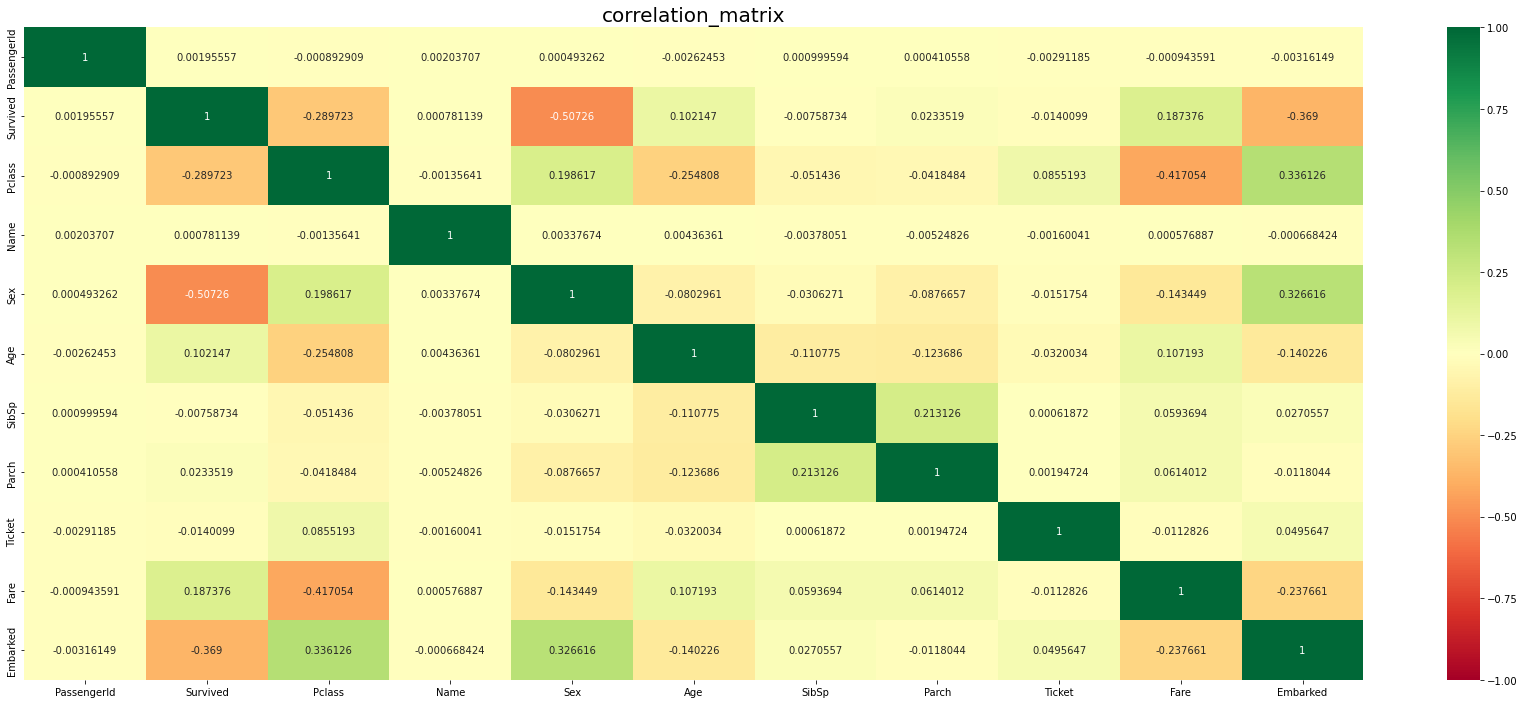

In [39]:
plt.figure(figsize=(30,12))
sns.heatmap(corr,vmax=+1,vmin=-1,fmt='g',cmap='RdYlGn',annot=True)
plt.title('correlation_matrix',fontsize=20)
plt.show()

In [40]:
a=corr[['Survived']]

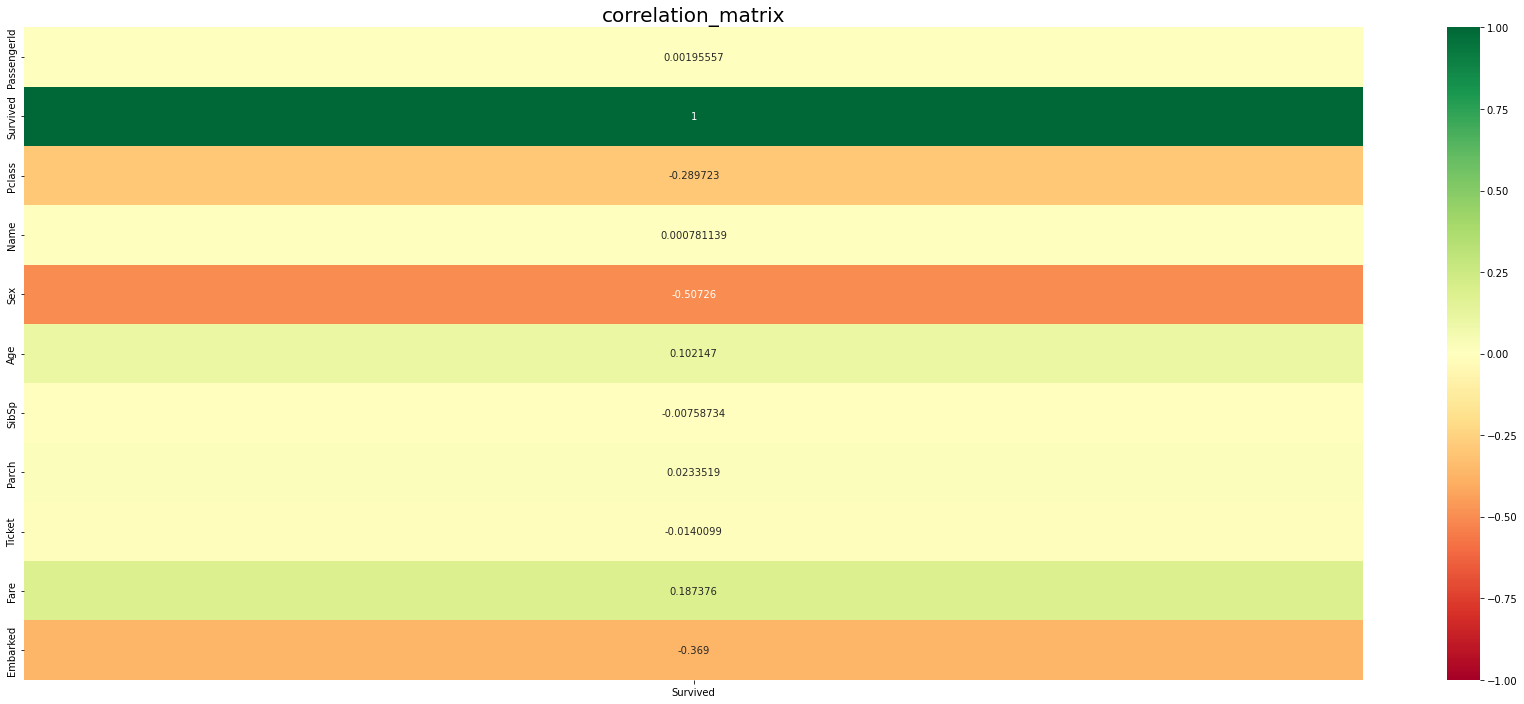

In [41]:
plt.figure(figsize=(30,12))
sns.heatmap(a,vmax=+1,vmin=-1,fmt='g',cmap='RdYlGn',annot=True)
plt.title('correlation_matrix',fontsize=20)
plt.show()

In [42]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [43]:
x=df.drop('Survived',axis=1)

In [44]:
y=df[['Survived']]

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
model=LogisticRegression()

In [49]:
model.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [50]:
y_pred=model.predict(x_test)

In [51]:
model.score(x_test,y_test)*100

70.71333333333332

In [52]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [53]:
cf=confusion_matrix(y_test,y_pred)

In [54]:
cf

array([[14637,  2576],
       [ 6210,  6577]], dtype=int64)

Text(0.5, 1.0, 'confusion matrix')

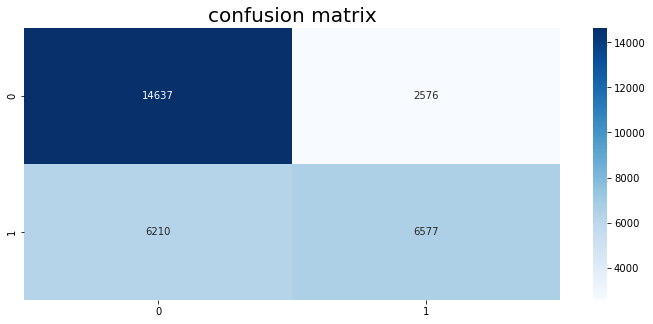

In [55]:
plt.figure(figsize=(12,5))
sns.heatmap(cf,annot=True,fmt='g',cmap='Blues')
plt.title('confusion matrix',fontsize=20)

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
model1=DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [58]:
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [59]:
y_pred1=model.predict(x_test)

In [60]:
model1.score(x_train,y_train)*100

77.07428571428572

In [61]:
model1.score(x_test,y_test)*100

76.96666666666667

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
model2=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=10)

In [64]:
model2.fit(x_train,y_train)

C:\Users\hp\AppData\Local\Temp/ipykernel_14652/2848998269.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=500)

In [65]:
ypred2=model2.predict(x_test)

In [66]:
model2.score(x_train,y_train)*100

79.43857142857142

In [67]:
model2.score(x_test,y_test)*100

77.49333333333334

In [68]:
from sklearn.ensemble import AdaBoostClassifier

In [69]:
model3=AdaBoostClassifier()

In [70]:
model3.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoostClassifier()

In [71]:
y_pred3=model3.predict(x_test)

In [72]:
accuracy_score(y_test,y_pred3)*100

77.27666666666667

In [73]:
model3.score(x_train,y_train)*100

77.42999999999999

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

In [75]:
model4=GradientBoostingClassifier()

In [76]:
model4.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingClassifier()

In [77]:
y_pred4=model4.predict(x_test)

In [78]:
model4.score(x_train,y_train)*100

77.75857142857143

In [79]:
accuracy_score(y_test,y_pred4)*100

77.49333333333334

In [80]:
from xgboost import XGBClassifier

In [81]:
model5=XGBClassifier()

In [82]:
model5.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[13:34:53] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [83]:
y_pred5=model5.predict(x_test)

In [84]:
accuracy_score(y_test,y_pred5)*100

77.15333333333334

In [85]:
model5.score(x_train,y_train)*100

81.55571428571429

In [86]:
from catboost import CatBoostClassifier

In [88]:
model6= CatBoostClassifier()

In [89]:
model6.fit(x_train,y_train)

Learning rate set to 0.063211
0:	learn: 0.6665772	total: 190ms	remaining: 3m 10s
1:	learn: 0.6430707	total: 255ms	remaining: 2m 7s
2:	learn: 0.6217577	total: 323ms	remaining: 1m 47s
3:	learn: 0.6036676	total: 346ms	remaining: 1m 26s
4:	learn: 0.5878623	total: 404ms	remaining: 1m 20s
5:	learn: 0.5750299	total: 428ms	remaining: 1m 10s
6:	learn: 0.5635680	total: 450ms	remaining: 1m 3s
7:	learn: 0.5537554	total: 472ms	remaining: 58.5s
8:	learn: 0.5453965	total: 497ms	remaining: 54.7s
9:	learn: 0.5380169	total: 524ms	remaining: 51.9s
10:	learn: 0.5316616	total: 547ms	remaining: 49.2s
11:	learn: 0.5263514	total: 570ms	remaining: 46.9s
12:	learn: 0.5217003	total: 594ms	remaining: 45.1s
13:	learn: 0.5175886	total: 623ms	remaining: 43.9s
14:	learn: 0.5139250	total: 646ms	remaining: 42.4s
15:	learn: 0.5111097	total: 669ms	remaining: 41.1s
16:	learn: 0.5077860	total: 695ms	remaining: 40.2s
17:	learn: 0.5053655	total: 720ms	remaining: 39.3s
18:	learn: 0.5032034	total: 742ms	remaining: 38.3s
19:	le

In [105]:
y_pred6 = model6.predict(x_test)

In [106]:
model6.score(x_train,y_train)*100

80.59857142857143

In [107]:
accuracy_score(y_test,y_pred6)*100

77.45

In [108]:
cf6=confusion_matrix(y_test,y_pred6)
cf6

array([[13912,  3301],
       [ 3464,  9323]], dtype=int64)

In [109]:
import lightgbm as lgbm

In [110]:
model7 = lgbm.LGBMClassifier()

In [111]:
model7.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LGBMClassifier()

In [112]:
y_pred7 = model7.predict(x_test)

In [113]:
accuracy_score(y_test,y_pred7)*100


77.52333333333333

In [114]:
model7.score(x_train,y_train)*100

78.78857142857143

In [115]:
cf7=confusion_matrix(y_test,y_pred7)
cf7

array([[13970,  3243],
       [ 3500,  9287]], dtype=int64)

In [116]:
import sklearn.ensemble from baggingClassifier

SyntaxError: invalid syntax (Temp/ipykernel_14652/3617133495.py, line 1)